In [12]:
import numpy as np
from scipy import misc
import itertools
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.cluster import KMeans
from matplotlib import pylab as plt
import matplotlib.cm as cm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
import re
%matplotlib inline

In [10]:
#(a)1372 articles x 5476 word feat: log smoothed word freq w/ zero mean
X = np.load("data/science2k-doc-word.npy")

In [29]:
vocab,title = [],[]
for line in open('./data/science2k-vocab.txt'):
    l = line.strip().split("\t")
    vocab.append(l)
for line in open('./data/science2k-titles.txt'):
    l = line.strip().split("\t")
    title.append(l)

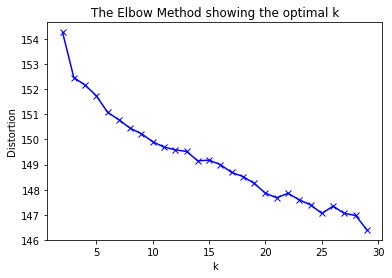

In [13]:
distortions = []
K = range(2,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Choose k=9

In [89]:
kmeanModel = KMeans(n_clusters=9).fit(X)
kmeanModel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
word_list = []
cluster_dists = []
for center in kmeanModel.cluster_centers_:
    word_ind = []
    cluster_dists.append(np.linalg.norm(center-np.mean(kmeanModel.cluster_centers_,axis=0)))
    indices = np.argsort((center-np.mean(kmeanModel.cluster_centers_,axis=0)))
    word_ind = [indices[-1], indices[-2], indices[-3], indices[-4], indices[-5],indices[-6], indices[-7], indices[-8], indices[-9], indices[-10]]
    for i in word_ind:
        word_list.append(vocab[i])

cluster_order = np.argsort(cluster_dists)
for j in cluster_order:
    print('############Cluster '+str(j)+': ')
    for k in range(10):
        print(word_list[j*10 + k])


############Cluster 2: 
['population']
['significant']
['significantly']
['reports']
['responses']
['mean']
['test']
['email']
['analysis']
['populations']
############Cluster 8: 
['energy']
['reports']
['electron']
['fig']
['solid']
['optical']
['shows']
['dependence']
['sample']
['magnetic']
############Cluster 5: 
['mail']
['compass']
['author']
['page']
['issue']
['news']
['sciences']
['policy']
['department']
['edu']
############Cluster 3: 
['climate']
['ocean']
['atmospheric']
['atmosphere']
['sea']
['global']
['records']
['atlantic']
['record']
['variability']
############Cluster 1: 
['cells']
['expression']
['protein']
['cell']
['gene']
['wild']
['proteins']
['mutant']
['expressed']
['control']
############Cluster 0: 
['earth']
['geophys']
['planet']
['thermal']
['depth']
['material']
['mantle']
['composition']
['crust']
['surface']
############Cluster 6: 
['says']
['researchers']
['scientists']
['people']
['get']
['year']
['just']
['say']
['team']
['national']
############Clus

In [91]:
for cluster in cluster_order:
    print('####### Cluster '+str(cluster)+': ')
    all_dist=[]
    member_indices = np.where(kmeanModel.labels_ == cluster)[0]
    cluster_members = X[member_indices,:]
    for member in cluster_members:
        all_dist.append(np.linalg.norm(member-kmeanModel.cluster_centers_[cluster]))
    indices = np.argsort(all_dist)
    close_indices = [indices[0], indices[1], indices[2], indices[3], indices[4],indices[5], indices[6], indices[7], indices[8], indices[9]]    
    for l in close_indices:
        print(title[member_indices[l]])
# word_list = np.array(word_list)
# word_list.flatten()
# for word in word_list:
#     print(word)

####### Cluster 2: 
['"Selectivity for 3D Shape That Reveals Distinct Areas within Macaque Inferior Temporal Cortex"']
['"Nonrandom Extinction and the Loss of Evolutionary History"']
['"Mirror-Image Confusion in Single Neurons of the Macaque Inferotemporal Cortex"']
['"An Empirical Assessment of Taxic Paleobiology"']
['"Abolition and Reversal of Strain Differences in Behavioral Responses to Drugs of Abuse after a Brief Experience"']
['"Promiscuity and the Primate Immune System"']
['"Language Discrimination by Human Newborns and by Cotton-Top Tamarin Monkeys"']
['"Natural Selection and Parallel Speciation in Sympatric Sticklebacks"']
['"Reversal of Antipsychotic-Induced Working Memory Deficits by Short-Term Dopamine D1 Receptor Stimulation"']
['"High Direct Estimate of the Mutation Rate in the Mitochondrial Genome of Caenorhabditis elegans"']
####### Cluster 8: 
['"The Formation of Chondrules at High Gas Pressures in the Solar Nebula"']
['"A Monoclinic Post-Stishovite Polymorph of Silic

The algorithm captures the field of study and style of Science papers. Such algorithm is useful for categorizing and organizing papers in a database and improve the result of search engines.

In [ ]:
#(b)

In [171]:
X2 = np.load("data/science2k-word-doc.npy")

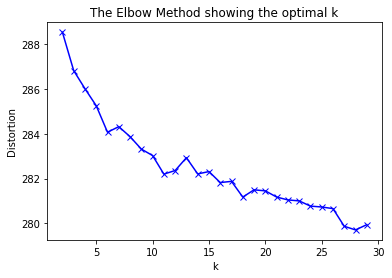

In [172]:
distortions = []
K = range(2,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X2)
    kmeanModel.fit(X2)
    distortions.append(sum(np.min(cdist(X2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Choose k=5

In [188]:
kmeanModel2 = KMeans(n_clusters=5).fit(X2)
kmeanModel2.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [189]:
doc_list = []
cluster_dists = []
for center in kmeanModel2.cluster_centers_:
    cluster_dists.append(np.linalg.norm(center-np.mean(kmeanModel2.cluster_centers_,axis=0)))
    indices = np.argsort((center-np.mean(kmeanModel2.cluster_centers_,axis=0)))
    doc_ind = [indices[-1], indices[-2], indices[-3], indices[-4], indices[-5],indices[-6], indices[-7], indices[-8], indices[-9], indices[-10]]
    for i in doc_ind:
        doc_list.append(title[i])

cluster_order = np.argsort(cluster_dists)
for j in cluster_order:
    print('############Cluster '+str(j)+': ')
    for k in range(10):
        print(doc_list[j*10 + k])


############Cluster 4: 
['"Into the Forbidden Zone"']
['"Clues from a Shocked Meteorite"']
['"Influences of Dietary Uptake and Reactive Sulfides on Metal Bioavailability from Aquatic Sediments"']
['"Nonavian Feathers in a Late Triassic Archosaur"']
['"Ambipolar Pentacene Field-Effect Transistors and Inverters"']
['"The Formation of Chondrules at High Gas Pressures in the Solar Nebula"']
['"National Academy of Sciences Elects New Members"']
['"A Monoclinic Post-Stishovite Polymorph of Silica in the Shergotty Meteorite"']
['"The Chi-Chi Earthquake Sequence: Active, Out-of-Sequence Thrust Faulting in Taiwan"']
['"Synthesis and Characterization of Helical Multi-Shell Gold Nanowires"']
############Cluster 3: 
['"Presidential Forum: Gore and Bush Offer Their Views on Science"']
['"Something to Be Done: Treating HIV/AIDS"']
['"A Mouse Chronology"']
['"Ecologists on a Mission to Save the World"']
['"Silent No Longer: \'Model Minority\' Mobilizes"']
['"Infectious History"']
['"Eligibility for C

In [190]:
for cluster in cluster_order:
    print('####### Cluster '+str(cluster)+': ')
    all_dist=[]
    member_indices = np.where(kmeanModel2.labels_ == cluster)[0]
    cluster_members = X2[member_indices,:]
    for member in cluster_members:
        all_dist.append(np.linalg.norm(member-kmeanModel2.cluster_centers_[cluster]))
    indices = np.argsort(all_dist)
    close_indices = [indices[0], indices[1], indices[2], indices[3], indices[4],indices[5], indices[6], indices[7], indices[8], indices[9]]    
    for l in close_indices:
        print(vocab[member_indices[l]])
        

####### Cluster 4: 
['aptamers']
['dnag']
['trxr']
['rory']
['lcts']
['proteorhodopsin']
['ag7']
['nompc']
['lg268']
['neas']
####### Cluster 3: 
['expectancy']
['celera']
['intelligence']
['managers']
['income']
['teachers']
['doe']
['mosquitoes']
['mosquito']
['essay']
####### Cluster 2: 
['www']
['approximation']
['angular']
['finite']
['coherent']
['nonlinear']
['periodic']
['regime']
['calculation']
['diffraction']
####### Cluster 1: 
['whats']
['thing']
['researcher']
['didnt']
['doesnt']
['hopes']
['got']
['plans']
['biologist']
['getting']
####### Cluster 0: 
['immunoblotting']
['immunoblot']
['immunoprecipitated']
['plasmids']
['polyacrylamide']
['lysates']
['immunoglobulin']
['bovine']
['wildtype']
['phosphorylated']
